<a href="https://colab.research.google.com/github/Ashoksai-tech/Advance_deep_learning_projects/blob/main/Covid_Images_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## appraoch to thes problem

1. Load the libraries and Images
2. visualize the images
3. Declare a sequential model
4. Declare Layers
      1. Convolutions(filter, stride, shape)
      2. pooling (Max/avg, Stride, shape)
      3. Flatten
      4. Dense Layer(number of layers, activation)
      5. output layer(activation, number of layers)
5. compile the model (optimizer, loss, Metrics)
6. fit the model (Dataset, Epochs, Batch size)
7. Model Evaluation

In [4]:
!wget --no-check-certificate 'https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/download' -O /content/covid19-image-dataset.zip


--2024-08-07 14:15:56--  https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fpranavraikokte%2Fcovid19-image-dataset%3Fresource%3Ddownload [following]
--2024-08-07 14:15:57--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fpranavraikokte%2Fcovid19-image-dataset%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/content/covid19-image-dataset.zip’

/content/covid19-im     [ <=>                ]   4.89K  --.-KB/s    in 0.001s  

2024-08-07 1

In [1]:
!wget https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/download

--2024-08-07 15:24:09--  https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/download
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fpranavraikokte%2Fcovid19-image-dataset%3Fresource%3Ddownload [following]
--2024-08-07 15:24:09--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fpranavraikokte%2Fcovid19-image-dataset%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download’

download                [ <=>                ]   4.84K  --.-KB/s    in 0.02s   

2024-08-07 15:24:09 (286 KB/s) - ‘down

importing the necessary libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout, Flatten, Dense

In [3]:
!unzip "/content/archive (32).zip"

Archive:  /content/archive (32).zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
  inflating: Covid1

separate directory for train and test

In [6]:
train_dir = '/content/Covid19-dataset/train'
test_dir = '/content/Covid19-dataset/test'

In [8]:
datagen = ImageDataGenerator()
train_generator = datagen.flow_from_directory(train_dir)
class_names = train_generator.class_indices.keys()
print(class_names)

Found 251 images belonging to 3 classes.
dict_keys(['Covid', 'Normal', 'Viral Pneumonia'])


Visualize the data

In [15]:
import os
def plot_images_from_classes(directory, classes):
    plt.figure(figsize=(12, 4))
    for i, class_name in enumerate(classes):
        # define the path to each class directory
        class_path = os.path.join(directory, class_name)

        # get the list of images in the directory
        image_files = os.listdir(class_path)

        # Load the first image
        img_path = os.path.join(class_path, image_files[0])
        img = Image.open(img_path)

        plt.subplot(1, len(classes), i + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

    plt.show()

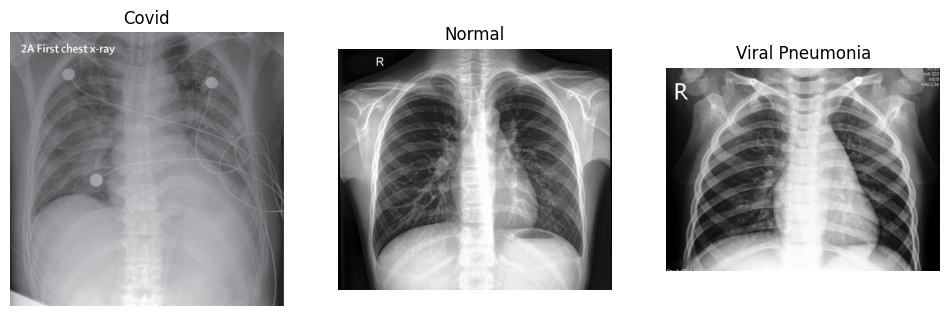

In [18]:
plot_images_from_classes(train_dir,class_names)

In [7]:
datagen = ImageDataGenerator()
test_generator = datagen.flow_from_directory(test_dir)
class_names = test_generator.class_indices.keys()
print(class_names)

Found 66 images belonging to 3 classes.
dict_keys(['Covid', 'Normal', 'Viral Pneumonia'])


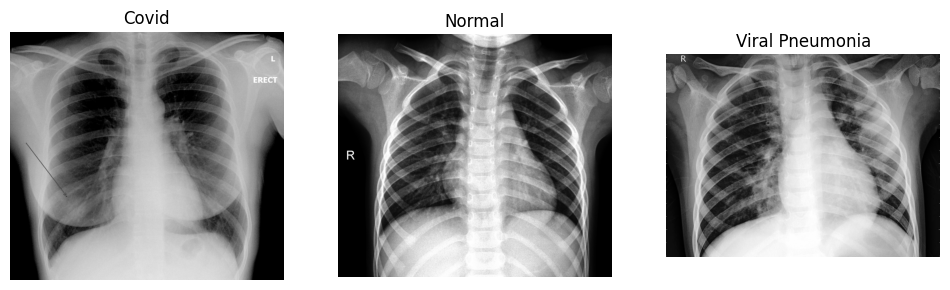

In [19]:
plot_images_from_classes(test_dir,class_names)

Preprocessing of data

In [4]:
TestDataGenerator = ImageDataGenerator(rescale=1/255)

TrainDataGenerator = ImageDataGenerator(rescale=1/255,
                                        zoom_range=0.15,
                                        rotation_range=12,
                                        height_shift_range=0.05,
                                        width_shift_range=0.05)

In [9]:
train_dataset = TrainDataGenerator.flow_from_directory(train_dir,target_size=(512,512),
                                                       batch_size=16,class_mode='categorical')

Found 251 images belonging to 3 classes.


In [10]:
test_dataset = TestDataGenerator.flow_from_directory(test_dir,target_size=(512,512),
                                                     batch_size=2,class_mode='categorical')

Found 66 images belonging to 3 classes.


building the model

In [22]:
model = Sequential()
#Block1
#convolution layer
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(512,512,3)))

#poolin layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#Block 2
#convolution layer
model.add(Conv2D(32,3,padding='same',activation='relu'))

#poolin layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#flatten layer
model.add(Flatten())

#fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile the model

In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 512, 512, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 256, 256, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      67,108,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,114,467 (256.02 MB)

 Trainable params: 67,114,467 (256.02 MB)

 Non-trainable params: 0 (0.00 B)

fit the model

In [26]:
hist = model.fit(train_dataset,epochs=10,validation_data = test_dataset,batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 112s 6s/step - accuracy: 0.3999 - loss: 18.1425 - val_accuracy: 0.5303 - val_loss: 1.7786
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.7574 - loss: 1.1144 - val_accuracy: 0.7576 - val_loss: 0.6719
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 106s 6s/step - accuracy: 0.8687 - loss: 0.4045 - val_accuracy: 0.8182 - val_loss: 0.7954
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.8679 - loss: 0.3220 - val_accuracy: 0.8485 - val_loss: 0.7400
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 141s 6s/step - accuracy: 0.9133 - loss: 0.2185 - val_accuracy: 0.9091 - val_loss: 0.9213
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 140s 6s/step - accuracy: 0.9204 - loss: 0.2077 - val_accuracy: 0.6667 - val_loss: 1.3257
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 147s 6s/step - accuracy: 0.9469 - loss: 0.1739 - val_accuracy: 0.6818 - val_loss: 1.3129
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 104s 6s/step - accuracy: 0.9100 - loss: 0.2043 - val_accuracy: 0.7879 - val_loss: 1

In [30]:
print(hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


interpretation of results

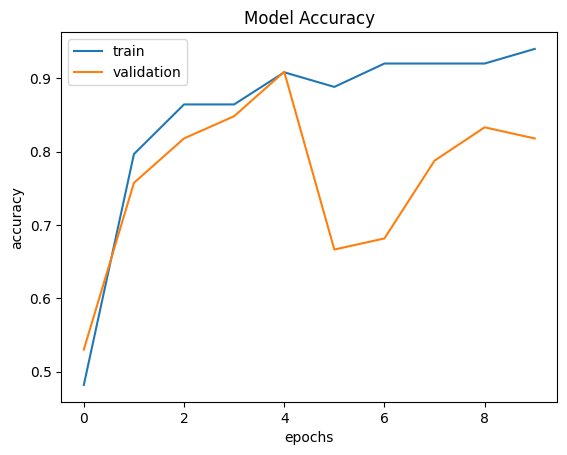

In [28]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])
plt.show()

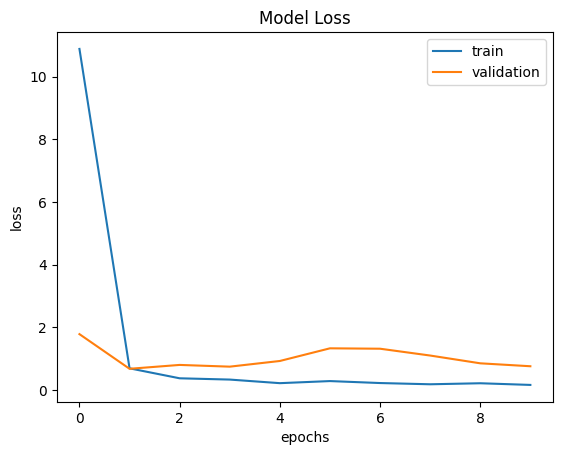

In [29]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])
plt.show()

In [32]:
model.evaluate(test_dataset)

33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 233ms/step - accuracy: 0.7398 - loss: 0.8732


[0.7531614303588867, 0.8181818127632141]